In [1]:
TrainExtendDir=r'C:\Users\Sir\OneDrive\Univeristy\HEA Analysis\4K06\Code\Data Folder\Processed 0922\Tbreak_Yield.csv'
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns

Features dropped due to high correlation: []
Explained Variance by the first 5 Principal Components: [0.28046551 0.13519854 0.09969611 0.08531805 0.07790105]
Total variance covered by the first 5 PCs: 0.6785792656057068


C:\Users\Sir\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
C:\Users\Sir\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\Sir\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` inste

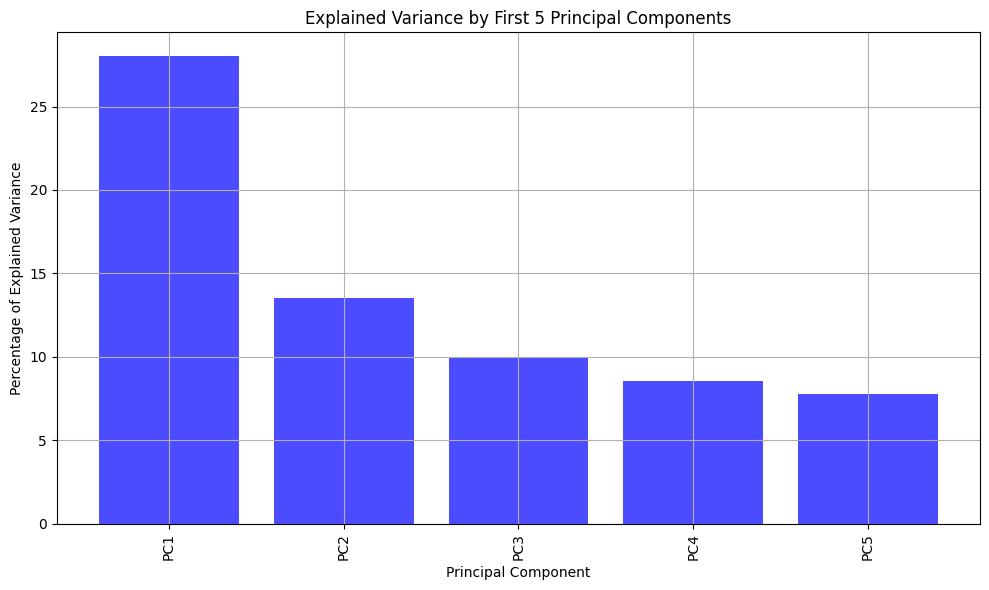

In [6]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import numpy as np

# Load the dataset (replace the file path with your actual data path)
data = pd.read_csv(r'C:\Users\Sir\OneDrive\Univeristy\HEA Analysis\4K06\Code\Data Folder\Processed 0922\Tbreak_Yield.csv')

# Features you want to analyze and their transformations (x^2 and sqrt(x))
# features = [
#     'VEC', 'ElectDiff', 'Atomic Size Diff', 'Mixing Enthalpy', 'Mixing Entropy', 
#     'AVG Shear Modulus', 'AVG Bulk Modulus', 'AVG Possion Ratio', 'Itinerate Electron', 
#     'Cohesive Energy', 'Gamma', 'Local Size Mismatch', 'Local Shear Modulus Mismatch', 
#     'Local Electronegativity Mismatch', 'Avg Melting Pt'
# ]

features = [
    'Al', 'Cr', 'Mn', 'Fe', 'Co', 'Ni', 'Cu', 'Ta', 'Ti', 'V', 
    'Zr', 'Nb', 'Mo', 'Zn', 'W', 'Sn', 'Nd', 'Hf', 'Si'
]


# Subset the data for selected features
X = data[features]


# 1. Calculate the correlation matrix
corr_matrix = X.corr().abs()

# 2. Remove highly correlated features
# Set a threshold for correlation (e.g., 0.9)
threshold = 0.85

# Select upper triangle of correlation matrix
upper_triangle = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))

# Find features with correlation above the threshold
to_drop = [column for column in upper_triangle.columns if any(upper_triangle[column] > threshold)]

# Remove highly correlated features
X_filtered = X.drop(columns=to_drop)

# Print the features that are dropped
print(f"Features dropped due to high correlation: {to_drop}")


# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_filtered)

# Perform PCA with 5 components
pca = PCA(n_components=5)
principal_components = pca.fit_transform(X_scaled)

# Explained variance for the first 5 principal components
explained_variance = pca.explained_variance_ratio_

# Print explained variance ratios
print(f"Explained Variance by the first 5 Principal Components: {explained_variance}")
print(f"Total variance covered by the first 5 PCs: {explained_variance.sum()}")

# Plot explained variance
plt.figure(figsize=(10, 6))
plt.bar(range(1, 6), explained_variance * 100, alpha=0.7, align='center', color='blue')
plt.ylabel('Percentage of Explained Variance')
plt.xlabel('Principal Component')
plt.title('Explained Variance by First 5 Principal Components')
plt.xticks(range(1, 6), labels=[f'PC{i}' for i in range(1, 6)], rotation=90)
plt.grid(True)
plt.tight_layout()
plt.show()


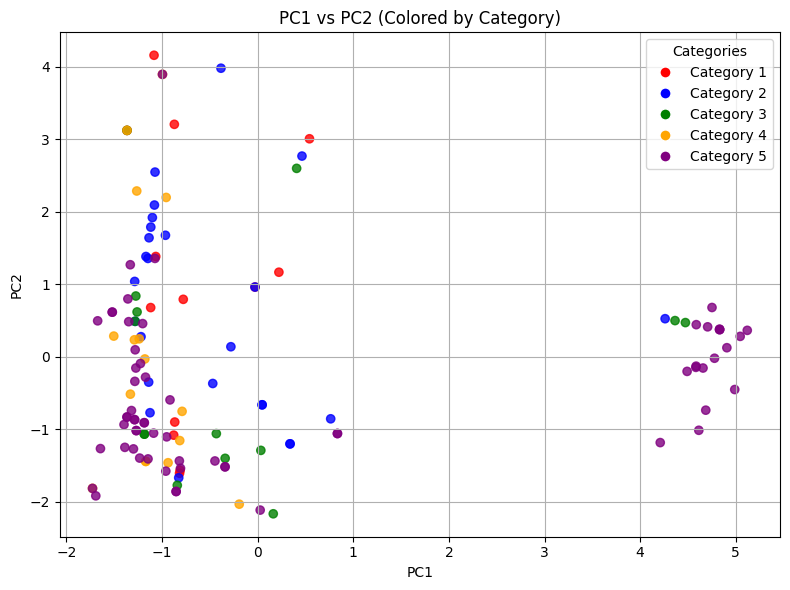

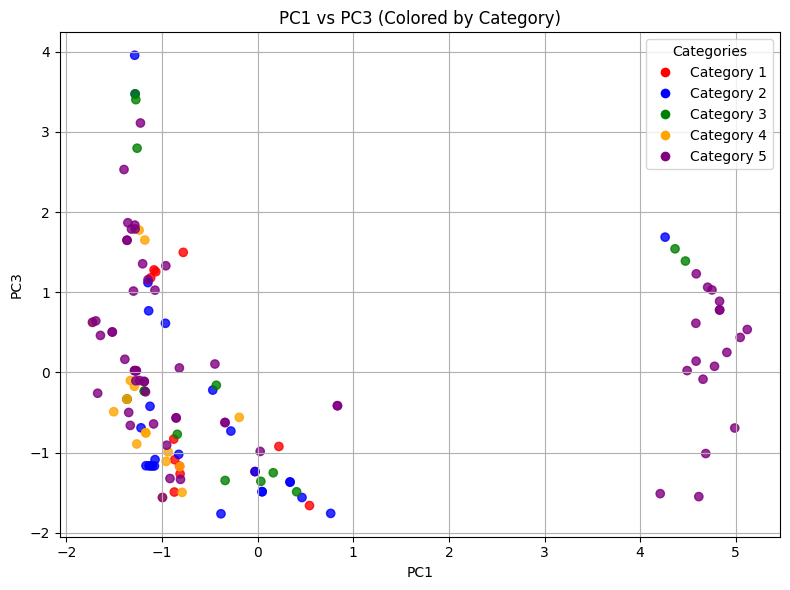

In [7]:
# Extract the first 5 PCs
PC1 = principal_components[:, 0]
PC2 = principal_components[:, 1]
PC3 = principal_components[:, 2]

# Extract the 'Cat' column for color mapping
categories = data['Cat']  # Assuming 'Cat' contains categorical values 1, 2, 3, 4, 5

# Define a colormap or use a default one
colors = ['red', 'blue', 'green', 'orange', 'purple']
category_colors = np.array([colors[cat - 1] for cat in categories])

# Create a mapping between categories and labels for the legend
category_labels = {1: 'Category 1', 2: 'Category 2', 3: 'Category 3', 4: 'Category 4', 5: 'Category 5'}
handles = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=colors[i-1], markersize=8, label=category_labels[i]) for i in category_labels]

# Plot PC1 vs PC2 with 'Cat' as different colors
plt.figure(figsize=(8, 6))
scatter = plt.scatter(PC1, PC2, c=category_colors, alpha=0.8)
plt.title('PC1 vs PC2 (Colored by Category)')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.grid(True)
plt.legend(handles=handles, title='Categories', loc='best')  # Add custom legend
plt.tight_layout()
plt.show()

# Plot PC1 vs PC3 with 'Cat' as different colors
plt.figure(figsize=(8, 6))
scatter = plt.scatter(PC1, PC3, c=category_colors, alpha=0.8)
plt.title('PC1 vs PC3 (Colored by Category)')
plt.xlabel('PC1')
plt.ylabel('PC3')
plt.grid(True)
plt.legend(handles=handles, title='Categories', loc='best')  # Add custom legend
plt.tight_layout()
plt.show()

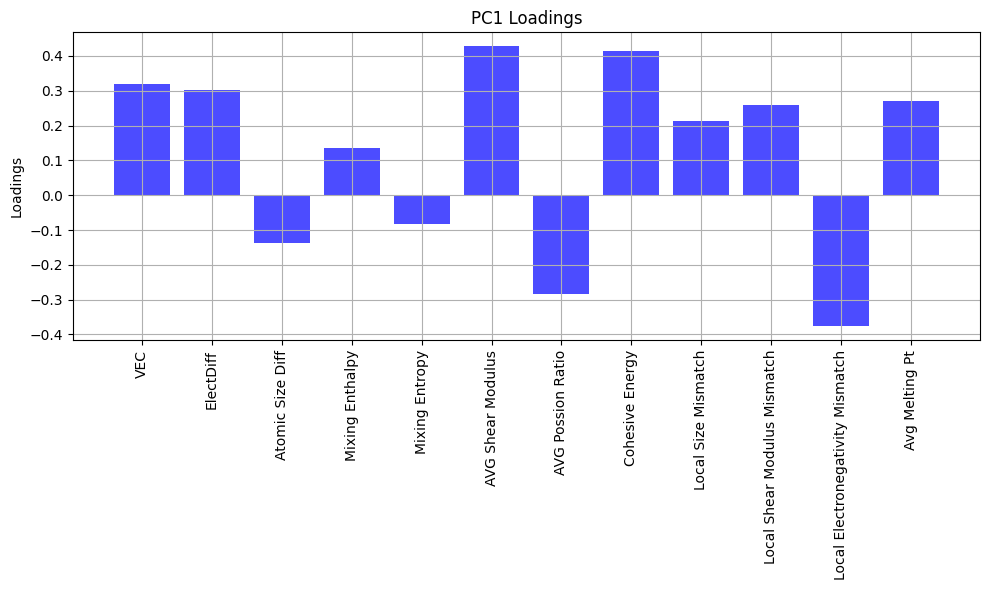

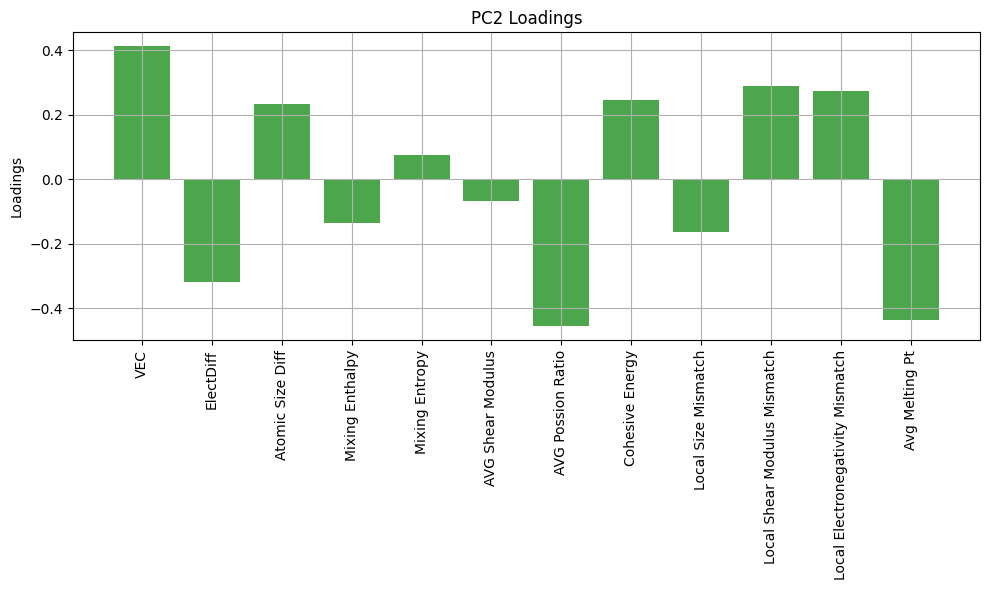

In [4]:
# Get the loadings (components)
loadings = pca.components_.T  # Transpose so each row corresponds to a feature, and columns to PCs

# Create a DataFrame for loadings
loading_df = pd.DataFrame(loadings, index=X_filtered.columns, columns=[f'PC{i+1}' for i in range(5)])

# Extract the loadings for PC1 and PC2
pc1_loadings = loading_df['PC1']
pc2_loadings = loading_df['PC2']

# Plot the loadings for PC1
plt.figure(figsize=(10, 6))
plt.bar(pc1_loadings.index, pc1_loadings, color='blue', alpha=0.7)
plt.title('PC1 Loadings')
plt.ylabel('Loadings')
plt.xticks(rotation=90)
plt.grid(True)
plt.tight_layout()
plt.show()

# Plot the loadings for PC2
plt.figure(figsize=(10, 6))
plt.bar(pc2_loadings.index, pc2_loadings, color='green', alpha=0.7)
plt.title('PC2 Loadings')
plt.ylabel('Loadings')
plt.xticks(rotation=90)
plt.grid(True)
plt.tight_layout()
plt.show()